In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the datasets
nba_df = pd.read_csv('./datasets/nba_2008-2024.csv')
team_df = pd.read_csv('./datasets/team_summaries.csv')

In [3]:
# Check for missing values in nba_2008-2024.csv
missing_nba = nba_df.isnull().sum()
print("Missing values in nba_2008-2024.csv:")
print(missing_nba)

# Check for missing values in team_summaries.csv
missing_ts = team_df.isnull().sum()
print("\nMissing values in team_summaries.csv:")
print(missing_ts)

Missing values in nba_2008-2024.csv:
season               0
date                 0
regular              0
playoffs             0
away                 0
home                 0
score_away           0
score_home           0
q1_away              0
q2_away              0
q3_away              0
q4_away              0
ot_away              0
q1_home              0
q2_home              0
q3_home              0
q4_home              0
ot_home              0
whos_favored         4
spread               7
total                4
moneyline_away    1977
moneyline_home    1977
h2_spread         1975
h2_total          1980
id_spread            7
id_total             4
dtype: int64

Missing values in team_summaries.csv:
season                0
lg                    0
team                  0
abbreviation         87
playoffs              0
age                  64
w                    88
l                    88
pw                    1
pl                    1
mov                   1
sos                   1
sr

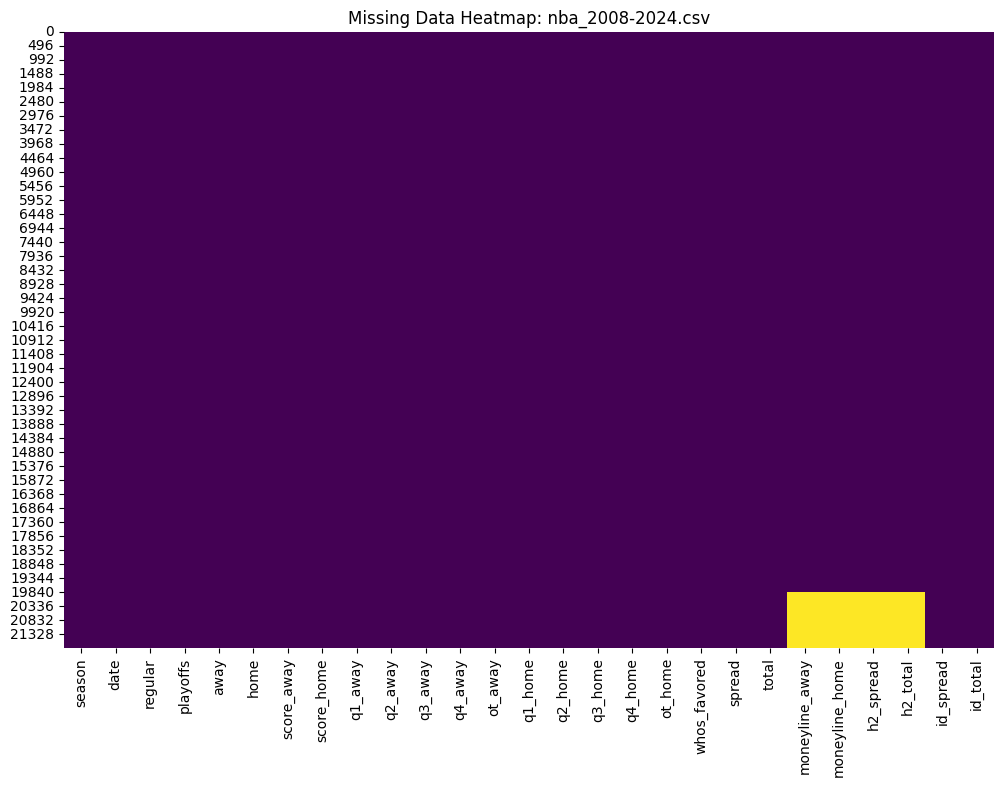

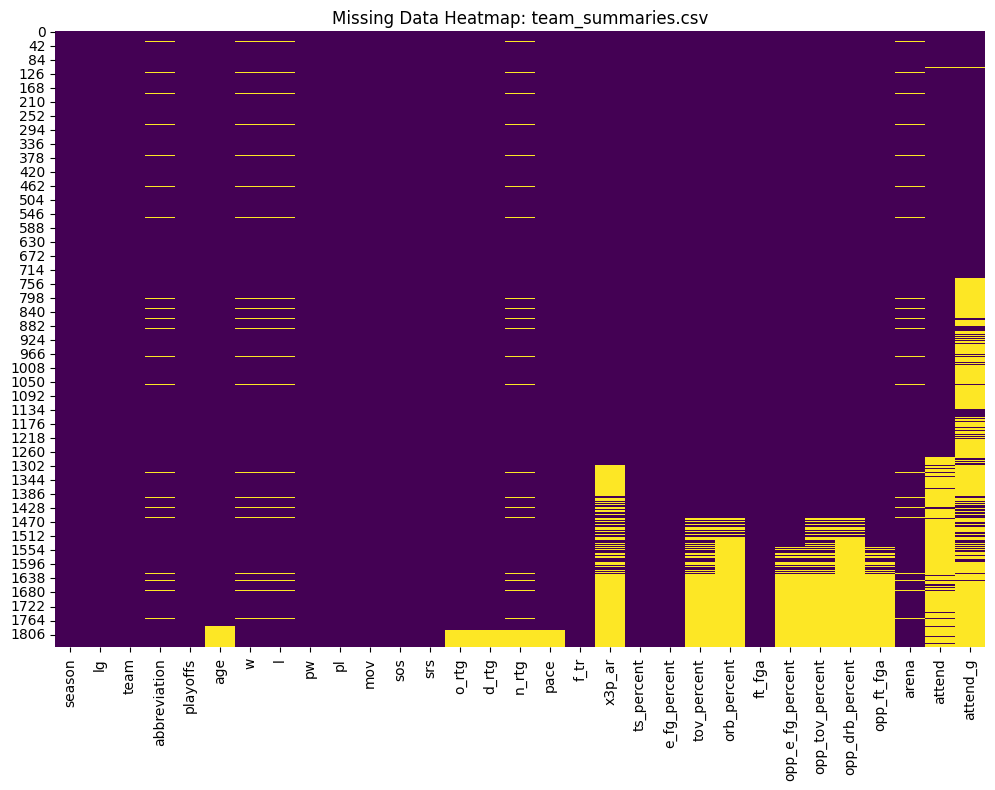

In [4]:
# Visualize missing data for nba_2008-2024.csv
plt.figure(figsize=(12, 8))
sns.heatmap(nba_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap: nba_2008-2024.csv')
plt.show()

# Visualize missing data for team_summaries.csv
plt.figure(figsize=(12, 8))
sns.heatmap(team_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap: team_summaries.csv')
plt.show()

In [5]:
# Remove rows with any missing values
nba_copy = nba_df.dropna().copy()
missing_data = nba_copy.isnull().sum()
print(missing_data)
nba_copy.shape

season            0
date              0
regular           0
playoffs          0
away              0
home              0
score_away        0
score_home        0
q1_away           0
q2_away           0
q3_away           0
q4_away           0
ot_away           0
q1_home           0
q2_home           0
q3_home           0
q4_home           0
ot_home           0
whos_favored      0
spread            0
total             0
moneyline_away    0
moneyline_home    0
h2_spread         0
h2_total          0
id_spread         0
id_total          0
dtype: int64


(19812, 27)

In [7]:
# Convert the 'regular' and 'playoffs' column to integer type
nba_copy.loc[:, 'regular'] = nba_copy['regular'].astype(int)
nba_copy.loc[:, 'playoffs'] = nba_copy['playoffs'].astype(int)

In [8]:
# Encode the 'whos_favored' column as binary values (1 for 'home', 0 for 'away')
nba_copy.loc[:, 'whos_favored_encoded'] = nba_copy['whos_favored'].apply(lambda x: 1 if x == 'home' else 0)
print(nba_copy)

       season        date  regular  playoffs  away home  score_away  \
0        2008  2007-10-30        1         0   por   sa          97   
1        2008  2007-10-30        1         0  utah   gs         117   
2        2008  2007-10-30        1         0   hou  lal          95   
3        2008  2007-10-31        1         0   phi  tor          97   
4        2008  2007-10-31        1         0   wsh  ind         110   
...       ...         ...      ...       ...   ...  ...         ...   
19817    2023  2023-01-16        1         0    gs  wsh         127   
19818    2023  2023-01-16        1         0   mia  atl         113   
19819    2023  2023-01-16        1         0  utah  min         126   
19820    2023  2023-01-16        1         0   phx  mem         106   
19821    2023  2023-01-16        1         0   hou  lal         132   

       score_home  q1_away  q2_away  ...  whos_favored  spread  total  \
0             106       26       23  ...          home    13.0  189.5   
1

In [12]:
team_copy = team_df.copy()

# Convert the 'playoffs' column to integer type
team_copy.loc[:, 'playoffs'] = nba_copy['playoffs'].astype(int)
print(team_copy)

      season   lg                     team abbreviation  playoffs   age     w  \
0       2024  NBA            Atlanta Hawks          ATL       0.0  26.2  36.0   
1       2024  NBA           Boston Celtics          BOS       0.0  28.2  64.0   
2       2024  NBA            Brooklyn Nets          BRK       0.0  26.1  32.0   
3       2024  NBA            Chicago Bulls          CHI       0.0  28.1  39.0   
4       2024  NBA        Charlotte Hornets          CHO       0.0  25.1  21.0   
...      ...  ...                      ...          ...       ...   ...   ...   
1840    1947  BAA  Providence Steamrollers          PRO       0.0   NaN  28.0   
1841    1947  BAA        St. Louis Bombers          STB       0.0   NaN  38.0   
1842    1947  BAA          Toronto Huskies          TRH       0.0   NaN  22.0   
1843    1947  BAA      Washington Capitols          WSC       0.0   NaN  49.0   
1844    1947  BAA           League Average          NaN       0.0   NaN   NaN   

         l    pw    pl  ...

C:\Users\Christian\AppData\Local\Temp\ipykernel_11584\2528451106.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 0. ... 0. 0. 0.]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  team_copy.loc[:, 'playoffs'] = nba_copy['playoffs'].astype(int)


In [ ]:
# Save the processed DataFrames
nba_copy.to_csv('./datasets/processed_nba_2008-2024.csv', index=False)
team_copy.to_csv('./datasets/processed_team_summaries.csv', index=False)

In [14]:
nba_copy.head()

,season,date,regular,playoffs,away,home,score_away,score_home,q1_away,q2_away,...,whos_favored,spread,total,moneyline_away,moneyline_home,h2_spread,h2_total,id_spread,id_total,whos_favored_encoded
0,2008,2007-10-30,1,0,por,sa,97,106,26,23,...,home,13.0,189.5,900.0,-1400.0,5.0,95.0,0.0,1.0,1
1,2008,2007-10-30,1,0,utah,gs,117,96,28,34,...,home,1.0,212.0,100.0,-120.0,3.0,105.5,0.0,1.0,1
2,2008,2007-10-30,1,0,hou,lal,95,93,16,27,...,away,5.0,199.0,-230.0,190.0,3.0,99.0,0.0,0.0,0
3,2008,2007-10-31,1,0,phi,tor,97,106,22,28,...,home,6.5,191.0,255.0,-305.0,2.0,96.5,1.0,1.0,1
4,2008,2007-10-31,1,0,wsh,ind,110,119,23,22,...,away,1.5,203.5,-125.0,105.0,1.0,105.0,0.0,1.0,0


# Feature Engineering

### Adding a 'Winner' Column Based on Game Results
In this step, we'll create a new column called `winner` to indicate which team won the game. We'll assign `1` for a home team win and `0` for an away team win..


In [28]:
# Now `nba_copy['winner']` contains 'away' if the away team won, and 'home' if the home team won
nba_copy['winner'] = nba_copy.apply(lambda row: 'away' if row['score_away'] > row['score_home'] else 'home', axis=1)
nba_copy.head()

,season,date,regular,playoffs,away,home,score_away,score_home,q1_away,q2_away,...,spread,total,moneyline_away,moneyline_home,h2_spread,h2_total,id_spread,id_total,whos_favored_encoded,winner
0,2008,2007-10-30,1,0,por,sa,97,106,26,23,...,13.0,189.5,900.0,-1400.0,5.0,95.0,0.0,1.0,1,home
1,2008,2007-10-30,1,0,utah,gs,117,96,28,34,...,1.0,212.0,100.0,-120.0,3.0,105.5,0.0,1.0,1,away
2,2008,2007-10-30,1,0,hou,lal,95,93,16,27,...,5.0,199.0,-230.0,190.0,3.0,99.0,0.0,0.0,0,away
3,2008,2007-10-31,1,0,phi,tor,97,106,22,28,...,6.5,191.0,255.0,-305.0,2.0,96.5,1.0,1.0,1,home
4,2008,2007-10-31,1,0,wsh,ind,110,119,23,22,...,1.5,203.5,-125.0,105.0,1.0,105.0,0.0,1.0,0,home


In [29]:
# Map 'home' to 0 and 'away' to 1
nba_copy['winner'] = nba_copy['winner'].map({'home': 1, 'away': 0})
nba_copy.head()

,season,date,regular,playoffs,away,home,score_away,score_home,q1_away,q2_away,...,spread,total,moneyline_away,moneyline_home,h2_spread,h2_total,id_spread,id_total,whos_favored_encoded,winner
0,2008,2007-10-30,1,0,por,sa,97,106,26,23,...,13.0,189.5,900.0,-1400.0,5.0,95.0,0.0,1.0,1,1
1,2008,2007-10-30,1,0,utah,gs,117,96,28,34,...,1.0,212.0,100.0,-120.0,3.0,105.5,0.0,1.0,1,0
2,2008,2007-10-30,1,0,hou,lal,95,93,16,27,...,5.0,199.0,-230.0,190.0,3.0,99.0,0.0,0.0,0,0
3,2008,2007-10-31,1,0,phi,tor,97,106,22,28,...,6.5,191.0,255.0,-305.0,2.0,96.5,1.0,1.0,1,1
4,2008,2007-10-31,1,0,wsh,ind,110,119,23,22,...,1.5,203.5,-125.0,105.0,1.0,105.0,0.0,1.0,0,1
